In [1]:
from Bio import SeqIO, Entrez
from pandas import Series, DataFrame
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from Bio.SeqUtils import GC
import numpy as np
import pylab as pl
from pylab import *
import numpy as np

In [2]:
pwd

'/home/user1'

In [3]:
ls

CpG.ipynb  Desktop/  Genbank.ipynb  abulon/  cursoSecuenciacion_masiva_mtdna/


In [4]:
ls cursoSecuenciacion_masiva_mtdna/data/

8_S356_L001_R1_001.fastq  8_S356_L001_R2_001.fastq


In [6]:
ls Desktop/data/

Abalone_vasa_HZ391319.fa              argonautas.gb
Abalone_vasa_HZ391319.gb              argos.fas
Hrufescens_mtDNASequence.csv          argos.gb
Hrufescens_mtDNASequences_NCBI.fasta  idt014contig20.fasta
argonautas.fasta


In [7]:
# fasta file to calculate the CpG content per contig
f = "./Desktop/data/Hrufescens_mtDNASequences_NCBI.fasta"

In [8]:
def cpg(secuencia):
    g= secuencia.count("G")
    c= secuencia.count("C")
    cg= secuencia.count("CG")
    lar= len(secuencia)
    cpG=0
    try:
        g*c==0
    except:
        cpG=0
    else:
        if g == 0 or c== 0:
            cpG =0
        else:
            cpG=(round(cg/(g*c)*(lar**2/(lar-1)) ,8))
    return (cpG)

In [10]:
sizes = [(rec.name, len(rec), round(GC(rec.seq),4), cpg(rec.seq)) for rec in SeqIO.parse(f, "fasta")]
sizes = DataFrame(sizes,columns= ["contigs", "length", "GC", "CpG"])
sizes.head()

,contigs,length,GC,CpG
0,JF281275,470,43.4043,0.614577
1,JF281274,470,42.7660,0.638214
2,JF281273,470,42.7660,0.638214
3,JF281272,470,42.7660,0.638214
4,JF281271,470,42.7660,0.638214


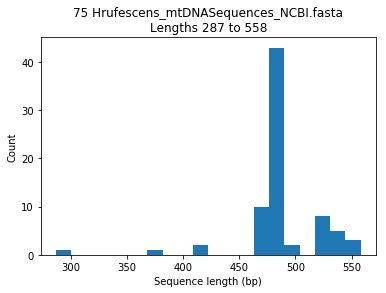

In [11]:
pylab.hist(sizes['length'], bins=20)
pylab.title("%i Hrufescens_mtDNASequences_NCBI.fasta\nLengths %i to %i" \
            % (len(sizes),min(sizes['length']),max(sizes['length'])))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
#pylab.legend().set_visible(False)
pylab.show()

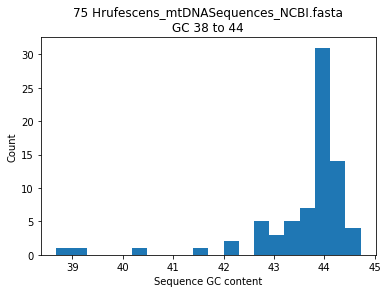

In [12]:
pylab.hist(sizes['GC'], bins=20)
pylab.title("%i Hrufescens_mtDNASequences_NCBI.fasta\nGC %i to %i" \
            % (len(sizes),min(sizes['GC']),max(sizes['GC'])))
pylab.xlabel("Sequence GC content")
pylab.ylabel("Count")
#pylab.legend().set_visible(False)
pylab.show()

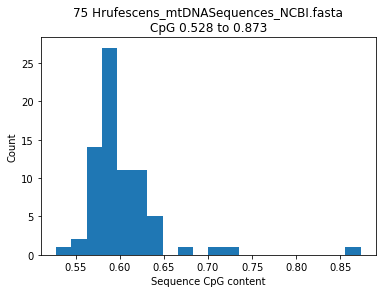

In [13]:
pylab.hist(sizes['CpG'], bins=20)
pylab.title("%i Hrufescens_mtDNASequences_NCBI.fasta\nCpG %1.3f to %1.3f" \
            % (len(sizes),min(sizes['CpG']),max(sizes['CpG'])))
pylab.xlabel("Sequence CpG content")
pylab.ylabel("Count")
#pylab.legend().set_visible(False)
pylab.show()

In [14]:
# fasta file to calculate the CpG content per contig
f = "./Desktop/data/idt014contig20.fasta"

In [15]:
sizes = [(rec.name, len(rec), round(GC(rec.seq),4), cpg(rec.seq)) for rec in SeqIO.parse(f, "fasta")]
sizes = DataFrame(sizes,columns= ["contigs", "length", "GC", "CpG"])
sizes.head(2)

,contigs,length,GC,CpG
0,idt014_contig_1,352,41.4773,1.987629
1,idt014_contig_2,248,36.6935,1.016343


In [16]:
sizes.describe()

,length,GC,CpG
count,5.00000,5.000000,5.000000
mean,590.40000,34.553460,0.826032
std,651.31659,9.138561,0.734519
min,248.00000,18.624600,0.106781
25%,251.00000,36.529700,0.343726
50%,349.00000,36.693500,0.675681
75%,352.00000,39.442200,1.016343
max,1752.00000,41.477300,1.987629


In [18]:
sizes1 = sizes['length'].value_counts(normalize=False, sort=False, ascending=False, 
                                  bins=range(0,sizes['length'].max()+100,100), dropna=True)
sizes1

(-0.001, 100.0]     0
(100.0, 200.0]      0
(200.0, 300.0]      2
(300.0, 400.0]      2
(400.0, 500.0]      0
(500.0, 600.0]      0
(600.0, 700.0]      0
(700.0, 800.0]      0
(800.0, 900.0]      0
(900.0, 1000.0]     0
(1000.0, 1100.0]    0
(1100.0, 1200.0]    0
(1200.0, 1300.0]    0
(1300.0, 1400.0]    0
(1400.0, 1500.0]    0
(1500.0, 1600.0]    0
(1600.0, 1700.0]    0
(1700.0, 1800.0]    1
Name: length, dtype: int64

In [19]:
sizesgc = sizes['GC'].value_counts(normalize=False, sort=False, ascending=False, 
                                  bins=range(0,int(sizes['GC'].max()+10),10), dropna=True)
sizesgc

(-0.001, 10.0]    0
(10.0, 20.0]      1
(20.0, 30.0]      0
(30.0, 40.0]      3
(40.0, 50.0]      1
Name: GC, dtype: int64

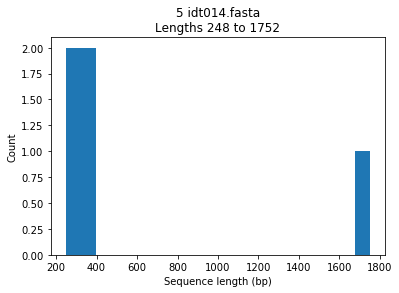

In [20]:
pylab.hist(sizes['length'], bins=20)
pylab.title("%i idt014.fasta\nLengths %i to %i" \
            % (len(sizes),min(sizes['length']),max(sizes['length'])))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
#pylab.legend().set_visible(False)
pylab.show()

In [55]:
# Secuencias de argonautas, nucleotidos
lineas ="AB191108, AY545104, HQ846022, HQ846036, KF017606, EU071435, JN800401, JN800402, AF369112, AF299267, AF299270, HM104247, AF299266"


In [56]:
#nucleotidos
secuencias= []
Entrez.email = "mdelrio@cicese.mx"
handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=lineas)
for seq_record in SeqIO.parse(handle, "gb"):
    print("%s %s..." % (seq_record.id, seq_record.description[:50]))
    print("Sequence length %i, %i features, from: %s"
          % (len(seq_record), len(seq_record.features), seq_record.annotations["source"]))
    secuencias.append(seq_record)

handle.close()

AB191108.1 Argonauta argo gene for 16S rRNA, partial sequence...
Sequence length 503, 2 features, from: Argonauta argo
AY545104.1 Argonauta nodosa 16S ribosomal RNA gene, partial s...
Sequence length 497, 2 features, from: mitochondrion Argonauta nodosa
HQ846022.1 Cistopus chinensis isolate L6 16S ribosomal RNA ge...
Sequence length 514, 2 features, from: mitochondrion Cistopus chinensis
HQ846036.1 Cistopus chinensis isolate P3 16S ribosomal RNA ge...
Sequence length 514, 2 features, from: mitochondrion Cistopus chinensis
KF017606.1 Cistopus chinensis mitochondrion, complete genome...
Sequence length 15706, 53 features, from: mitochondrion Cistopus chinensis
EU071435.1 Graneledone boreopacifica 16S ribosomal RNA gene, ...
Sequence length 509, 2 features, from: mitochondrion Graneledone boreopacifica
JN800401.1 Graneledone sp. CMI-2012 isolate A 16S ribosomal R...
Sequence length 557, 2 features, from: mitochondrion Graneledone sp. CMI-2012
JN800402.1 Graneledone sp. CMI-2012 isolate B 

In [57]:
SeqIO.write(secuencias, "./Desktop/data/argos.gb", "gb")
SeqIO.write(secuencias, "./Desktop/data/argos.fas", "fasta")



13

In [58]:
!head -10 ./data/argos.gb

LOCUS       AB191108                 503 bp    DNA     linear   INV 23-MAR-2005
DEFINITION  Argonauta argo gene for 16S rRNA, partial sequence.
ACCESSION   AB191108
VERSION     AB191108.1
KEYWORDS    .
SOURCE      Argonauta argo
  ORGANISM  Argonauta argo
            Eukaryota; Metazoa; Lophotrochozoa; Mollusca; Cephalopoda;
            Coleoidea; Neocoleoidea; Octopodiformes; Octopoda; Incirrata;
            Argonautidae; Argonauta.


In [59]:
!head -20 ./data/argos.fas

>AB191108.1 Argonauta argo gene for 16S rRNA, partial sequence
GTCTCTTTGAGTGAAGATAATAAAGAGTTGGGCCTGCTCGGTGAATAAATTTTAACAGCT
GCGGTTTAATATCTGTACTAAGGTAGCATAATAATTTGTCTTATAAATTGAGACTAGAAT
GAATGGTTTGACGAAAATTATACTGTCTCTATTATATTTTTTTGAAATTAATTTTTAAAG
TGAAAAAGCTTAAATTTTTTAAAGGGACGAGAAGACCCTATTGAGCTTATATTAATAAGA
TAATATAATAAATTTATTATTTTTTTTTAATTTTGGTTGGGGTGATCAAGGAAATAAAAA
TAAATAACTTCCTTAATTATATTTATCTGTTAGGATAATAAACAAAATGTATTTCTTTTA
TGATAAGTTACCATAGGGATAACAGCGTAATTTCTTTTGAGAGTTCTTATTAAAAAAGAA
GATTGCGACCTCGATGTTGGATTAAAATTAACCTTAAGGTGGAGAAGCTTTATTTGGTAA
ATCTGTTCGATTTTTAAAATTTT
>AY545104.1 Argonauta nodosa 16S ribosomal RNA gene, partial sequence; mitochondrial
GTCTCTTTGATTTTTATAATAAAGAGTTGGGCCTGCTCAGTGATGAATTTAACAGCTGCG
GTTAATAACTGTACTAAGGTAGCATAATAAATTGTCTTATAAATTGAGACTAGAATGAAT
GGTTTGACGAAAGTTATACTGTCTCTATTATATTTTTTTGAAATTAATTTTTATAGTGAA
AAAGCTTAAATTTTTTAAAGGGACGAAAAGACCCTATTGAGCTTTATATTAATAATTGAT
AATTGAAAATTTATTATATTATTATTTTTAATTTTGGTTGGGGTGATCGAGGAATAAAAA
AGAGATTAATAACTTCCTTAAATAGATTTCTTTTA

In [21]:
# fasta file to calculate the CpG content per contig
f = "./Desktop/data/argos.fas"

In [22]:
sizes = [(rec.name, len(rec), round(GC(rec.seq),4), cpg(rec.seq)) for rec in SeqIO.parse(f, "fasta")]
sizes = DataFrame(sizes,columns= ["contigs", "length", "GC", "CpG"])
sizes.head(2)

,contigs,length,GC,CpG
0,AB191108.1,503,26.2425,1.019215
1,AY545104.1,497,26.5594,1.007082


In [23]:
sizes.describe()

,length,GC,CpG
count,13.000000,13.000000,13.000000
mean,1683.230769,26.792215,0.989518
std,4213.363446,1.111426,0.121388
min,497.000000,23.793500,0.637906
25%,502.000000,26.242500,0.942580
50%,510.000000,27.237400,1.019215
75%,514.000000,27.490000,1.038069
max,15706.000000,27.827600,1.124445


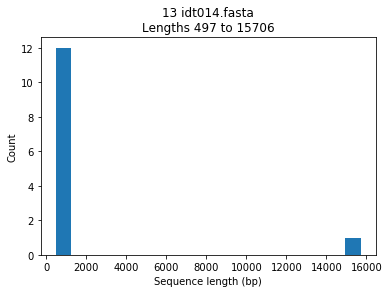

In [24]:
pylab.hist(sizes['length'], bins=20)
pylab.title("%i idt014.fasta\nLengths %i to %i" \
            % (len(sizes),min(sizes['length']),max(sizes['length'])))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
#pylab.legend().set_visible(False)
pylab.show()

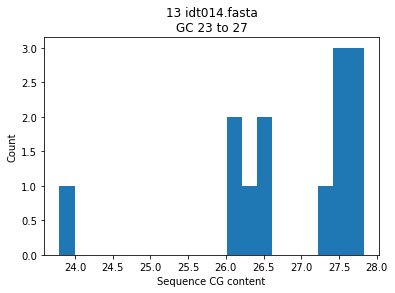

In [25]:
pylab.hist(sizes['GC'], bins=20)
pylab.title("%i idt014.fasta\nGC %i to %i" \
            % (len(sizes),min(sizes['GC']),max(sizes['GC'])))
pylab.xlabel("Sequence CG content")
pylab.ylabel("Count")
#pylab.legend().set_visible(False)
pylab.show()

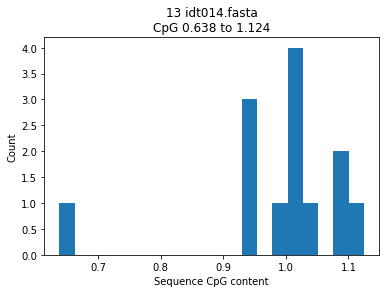

In [26]:
pylab.hist(sizes['CpG'], bins=20)
pylab.title("%i idt014.fasta\nCpG %1.3f to %1.3f" \
            % (len(sizes),min(sizes['CpG']),max(sizes['CpG'])))
pylab.xlabel("Sequence CpG content")
pylab.ylabel("Count")
#pylab.legend().set_visible(False)
pylab.show()

In [27]:
# fasta file to calculate the CpG content per contig
handle = "./Desktop/data/Hrufescens_mtDNASequences_NCBI.fasta"

In [28]:
record_id = []
n=0
record_cpg, record_cg = [], []
for record in SeqIO.parse(handle, "fasta") :
    g= record.seq.count("G")
    c= record.seq.count("C")
    cg= record.seq.count("CG")
    lar= len(record.seq)
    try:
        g*c==0
    except:
        print (record.id)
        record_id.append(record.id)
        record_cpg.append(0.0000)
        record_cg.append(round ((g+c)/lar,4))
    else:
        print (record.id, round(cg/(g*c)*(lar**2/(lar-1)) ,4), round((g+c)/lar,4))
        record_id.append(record.id)
        record_cpg.append(round(cg/(g*c)*(lar**2/(lar-1)) ,4))
        record_cg.append(round ((g+c)/lar,4))
    n+=1
    if n==10:
        break

JF281275 0.6146 0.434
JF281274 0.6382 0.4277
JF281273 0.6382 0.4277
JF281272 0.6382 0.4277
JF281271 0.6382 0.4277
JF281270 0.6301 0.4298
JF281269 0.6382 0.4277
JF281268 0.6223 0.4319
JF281267 0.6223 0.4319
JF281266 0.6146 0.434


In [29]:
records = DataFrame({'id':record_id, 'CpG':record_cpg, 'CG':record_cg})
records

,id,CpG,CG
0,JF281275,0.6146,0.4340
1,JF281274,0.6382,0.4277
2,JF281273,0.6382,0.4277
3,JF281272,0.6382,0.4277
4,JF281271,0.6382,0.4277
5,JF281270,0.6301,0.4298
6,JF281269,0.6382,0.4277
7,JF281268,0.6223,0.4319
8,JF281267,0.6223,0.4319
9,JF281266,0.6146,0.4340


In [30]:
records.describe()

,CpG,CG
count,10.000000,10.000000
mean,0.629490,0.430010
std,0.010146,0.002702
min,0.614600,0.427700
25%,0.622300,0.427700
50%,0.634150,0.428750
75%,0.638200,0.431900
max,0.638200,0.434000


In [28]:
records.to_csv('./Desktop/data/Hrufescens_mtDNASequence.csv')

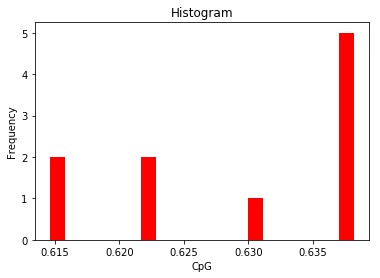

In [31]:
ax = plt.gca()
# the histogram of the data
ax.hist(records['CpG'],bins=20, color='r')

ax.set_xlabel('CpG')
ax.set_ylabel('Frequency')
ax.set_title(r'Histogram' )
plt.show()

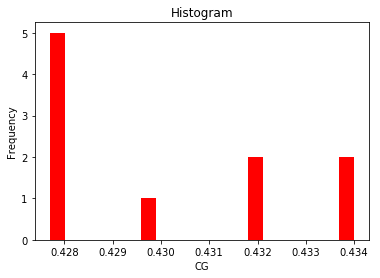

In [32]:
ax = plt.gca()
# the histogram of the data
ax.hist(records['CG'],bins=20, color='r')

ax.set_xlabel('CG')
ax.set_ylabel('Frequency')
ax.set_title(r'Histogram' )
plt.show()

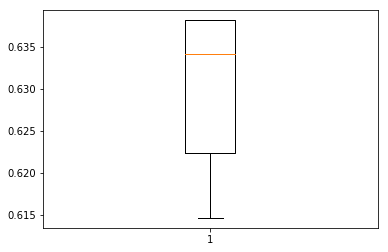

In [33]:
boxplot(records['CpG'],)
show()

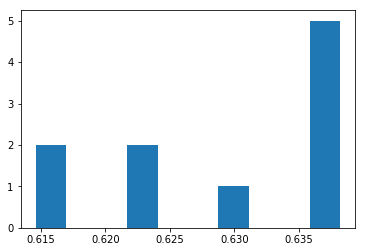

In [34]:
hist(records['CpG'])
show()

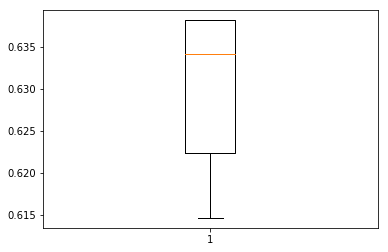

In [77]:
boxplot(records['CpG'])
show()

In [1]:
!blastn -help


USAGE
  blastn [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-entrez_query entrez_query]
    [-db_soft_mask filtering_algorithm] [-db_hard_mask filtering_algorithm]
    [-subject subject_input_file] [-subject_loc range] [-query input_file]
    [-out output_file] [-evalue evalue] [-word_size int_value]
    [-gapopen open_penalty] [-gapextend extend_penalty]
    [-perc_identity float_value] [-qcov_hsp_perc float_value]
    [-max_hsps int_value] [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value]
    [-sum_stats bool_value] [-penalty penalty] [-reward reward] [-no_greedy]
    [-min_raw_gapped_score int_value] [-template_type type]
    [-template_length int_value] [-dust DUST_options]
    [-filtering_db filtering_database]
    [-window_masker_taxid window_ma

In [3]:
!trinotator -help

/bin/sh: 1: trinotator: not found
